In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
%matplotlib inline


In [4]:
# Load the data
dfu = pd.read_csv('d:/Ukesh/Coding Shinobi/Codealpha_tasks/Task 2/Unemployment in India.csv')


In [5]:
dfu.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
dfu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
dfu.shape


(768, 7)

In [8]:
dfu.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
import warnings
warnings.simplefilter('ignore')
print("Sucessfully Suppressed Warnings")


Sucessfully Suppressed Warnings


In [10]:
dfu.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
dfu.columns = dfu.columns.str.strip()


In [12]:
# Display Columns name
print("Columns Names \n")
for i in dfu.columns:
    print(i)    


Columns Names 

Region
Date
Frequency
Estimated Unemployment Rate (%)
Estimated Employed
Estimated Labour Participation Rate (%)
Area


In [13]:
# Rename the columns
dfu.rename(columns={'Estimated Unemployment Rate (%)' : 'Unemployment_Rate','Estimated Employed' : 'Employed','Estimated Labour Participation Rate (%)' : 'Labour_Participation_Rate'}, inplace=True)

# Display Columns name
print("Columns Names \n")
print(dfu.columns)


Columns Names 

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Area'],
      dtype='object')


In [14]:
dfu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     740 non-null    object 
 1   Date                       740 non-null    object 
 2   Frequency                  740 non-null    object 
 3   Unemployment_Rate          740 non-null    float64
 4   Employed                   740 non-null    float64
 5   Labour_Participation_Rate  740 non-null    float64
 6   Area                       740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [15]:
# setting display format of floating point numbers
pd.options.display.float_format = '{:.2f}'.format

# Display the data and describe the data
dfu.describe()



,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740.00,740.00,740.00
mean,11.79,7204460.03,42.63
std,10.72,8087988.43,8.11
min,0.00,49420.00,13.33
25%,4.66,1190404.50,38.06
50%,8.35,4744178.50,41.16
75%,15.89,11275489.50,45.51
max,76.74,45777509.00,72.57


In [16]:
# Handling Missing Values

# Check for missing values
missing_values = dfu.isnull().sum()

# Find the percentage of missing values in each column
missing_percentage = (missing_values /
                      len(dfu)) * 100  

# display the missing values and their percentage
print('missing values\n')
print(missing_values, '\n\n')

print('percentage of missing values\n')
print(missing_percentage.apply(lambda x: f'{x:.0f}%'))




missing values

Region                       28
Date                         28
Frequency                    28
Unemployment_Rate            28
Employed                     28
Labour_Participation_Rate    28
Area                         28
dtype: int64 


percentage of missing values

Region                       4%
Date                         4%
Frequency                    4%
Unemployment_Rate            4%
Employed                     4%
Labour_Participation_Rate    4%
Area                         4%
dtype: object


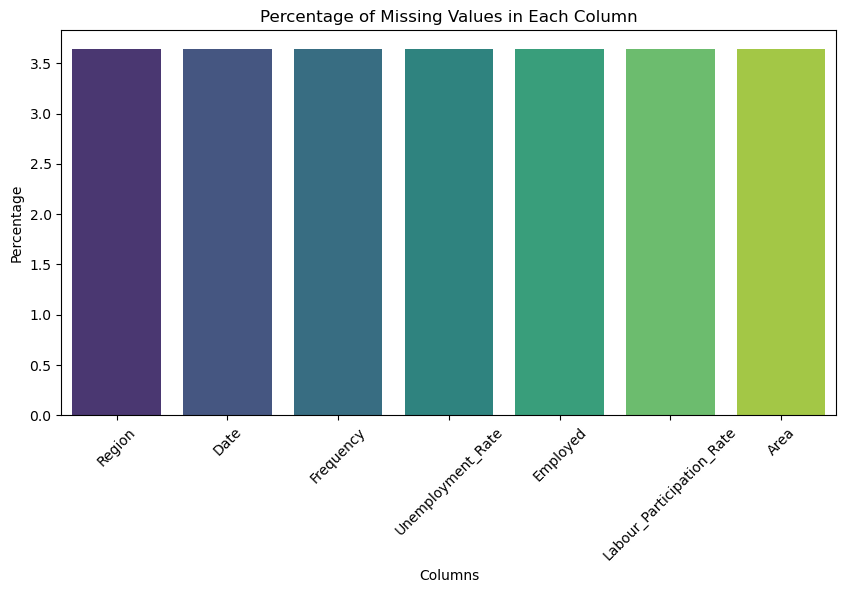

In [17]:
# Plot the missing values with percentage in a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=dfu.columns, y=missing_percentage, palette='viridis')
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()




In [18]:
# Fill the missing values with the mean of the column
dfu['Unemployment_Rate'].fillna(dfu['Unemployment_Rate'].mean(), inplace=True)
dfu['Employed'].fillna(dfu['Employed'].mean(), inplace=True)
dfu['Labour_Participation_Rate'].fillna(dfu['Labour_Participation_Rate'].mean(), inplace=True)

# Fill missing values with mode for categorical columns
dfu['Region'].fillna(dfu['Region'].mode()[0], inplace=True)
dfu['Date'].fillna(dfu['Date'].mode()[0], inplace=True)
dfu['Frequency'].fillna(dfu['Frequency'].mode()[0], inplace=True)
dfu['Area'].fillna(dfu['Area'].mode()[0], inplace=True)

# Display the values 
print('Missing values after filling\n')
print('Missing Data is less than 5% so we can impute the missing values')

dfu.isnull().sum()


Missing values after filling

Missing Data is less than 5% so we can impute the missing values


Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

In [19]:
# rechecking missing values after imputation 
dfu.isna().sum()


Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

In [20]:
# Duplicate Rows

# Check for duplicate rows
print(f'Rows before dropping duplicate : {dfu.shape[0]}')
print(f'Duplicate Rows : {dfu.duplicated().sum()}')


Rows before dropping duplicate : 768
Duplicate Rows : 27


In [21]:
# Display the duplicate rows
duplicate_rows = dfu[dfu.duplicated()].head(10)
duplicate_rows


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
360,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
361,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
362,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
363,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
364,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
365,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
366,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
367,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
368,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban
369,Andhra Pradesh,30-11-2019,Monthly,11.79,7204460.03,42.63,Urban


In [22]:
# Drop the duplicate rows
dfu.drop_duplicates(inplace=True)

print('Duplicate rows dropped \n')
print(f'Rows after dropping duplicate : {dfu.shape[0]}')


Duplicate rows dropped 

Rows after dropping duplicate : 741


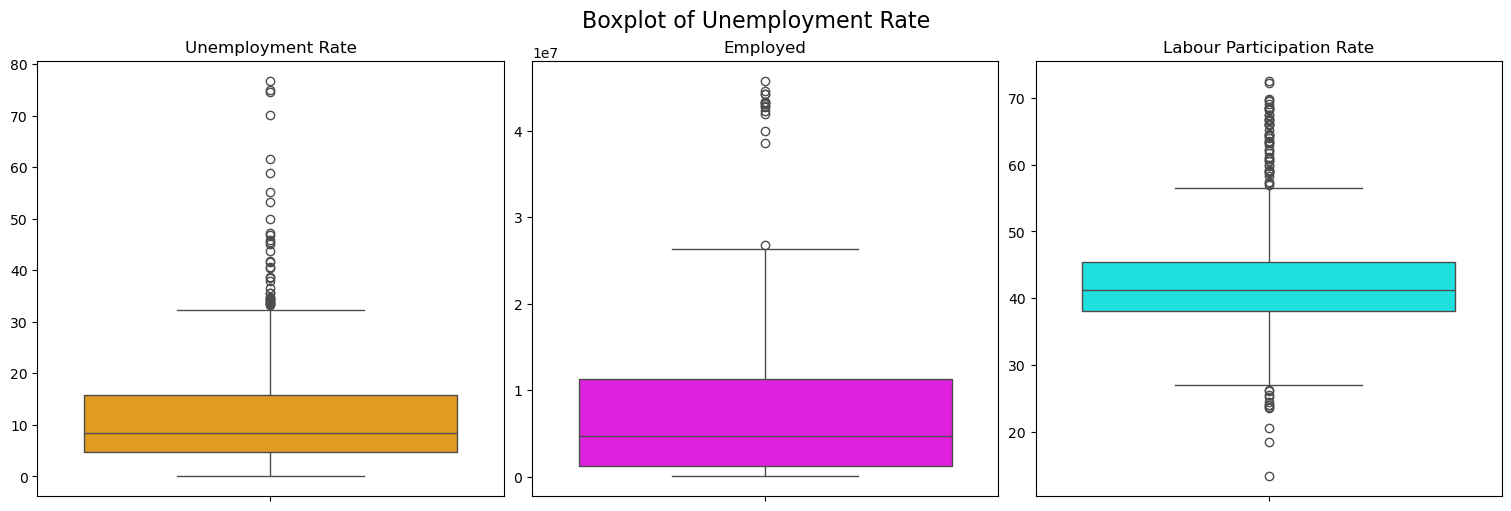

In [23]:
# Outliers

# Set up the figure with row and columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Creating individual plots
sns.boxplot(ax=axes[0], y=dfu['Unemployment_Rate'], color='orange')
axes[0].set_title('Unemployment Rate')
axes[0].set_ylabel('')

sns.boxplot(ax=axes[1], y=dfu['Employed'], color='magenta')
axes[1].set_title('Employed')
axes[1].set_ylabel('')

sns.boxplot(ax=axes[2], y=dfu['Labour_Participation_Rate'], color='cyan')
axes[2].set_title('Labour Participation Rate')
axes[2].set_ylabel('')

# Common title for all the plots
fig.suptitle('Boxplot of Unemployment Rate', fontsize=16)

# Display the plots
plt.show()


In [24]:
# Checking Outliers in individual columns

# Function to detect outliers using IQR
def find_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Define function to find outliers using Z-score
def find_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > 3]
    return outliers

# Find outliers in the 'Unemployment Rate' column using IQR
iqr_outliers = find_outliers_iqr(dfu, 'Unemployment_Rate')
print(f'IQR Method : {iqr_outliers.shape[0]} outliers found in Unemployment Rate')

# Find outliers in the 'Unemployment Rate' column using Z-score
zscore_outliers = find_outliers_zscore(dfu, 'Unemployment_Rate')
print(f'Z-score Method : {zscore_outliers.shape[0]} outliers found in Unemployment Rate')



IQR Method : 35 outliers found in Unemployment Rate
Z-score Method : 14 outliers found in Unemployment Rate


In [25]:
# Finding Outliers of the whole dataset

# outliers using z-score method
z = np.abs(stats.zscore(dfu[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']]))
outliers = (z > 3).sum()
print(f'Number of outliers using Z-score method : {outliers}')

# outliers using IQR method
Q1 = dfu[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']].quantile(0.25)
Q3 = dfu[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']].quantile(0.75)
iqr = Q3 - Q1
outliers = ((dfu[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']] < (Q1 - 1.5 * iqr)) | (dfu[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']] > (Q3 + 1.5 * iqr)))    
print(f'Number of outliers using IQR method : {outliers.sum().sum()}')


Number of outliers using Z-score method : Labour_Participation_Rate    14
Employed                     14
Unemployment_Rate            14
dtype: int64
Number of outliers using IQR method : 113


In [26]:
# Data type conversion

dfu.dtypes


Region                        object
Date                          object
Frequency                     object
Unemployment_Rate            float64
Employed                     float64
Labour_Participation_Rate    float64
Area                          object
dtype: object

In [27]:
# Conversion of date column to datetime 
dfu['Date'] = pd.to_datetime(dfu['Date'])

# convert object to category data type
dfu['Region'] = dfu['Region'].astype('category')
dfu['Frequency'] = dfu['Frequency'].astype('category')
dfu['Area'] = dfu['Area'].astype('category')

# Display the data types
dfu.dtypes


Region                             category
Date                         datetime64[ns]
Frequency                          category
Unemployment_Rate                   float64
Employed                            float64
Labour_Participation_Rate           float64
Area                               category
dtype: object

In [28]:
# Feature Engineering

# Extracting year, month, and day from the date column
dfu['Year'] = dfu['Date'].dt.year # Extract year
dfu['Month'] = dfu['Date'].dt.month # Extract month
dfu['Day'] = dfu['Date'].dt.day # Extract day

# Unemployment Rate Category based on low, medium, and high
bins=[0, 5, 10, 25, 100] # Define the bins
labels=['Low', 'Medium', 'High', 'Very High'] # Define the labels
dfu['Unemployment_Rate_Category'] = pd.cut(dfu['Unemployment_Rate'], bins=bins, labels=labels, right=False) # Create a new category column

# employment growth rate month on month
# sort by region, area, date to ensure the data is in the correct order
dfu = dfu.sort_values(['Region', 'Area', 'Date'])

# Calculate the employment growth rate
dfu['Employment_Growth_Rate'] = dfu.groupby(['Region', 'Area'])['Employed'].pct_change()*100

# Fill the missing values with 0
dfu['Employment_Growth_Rate'] = dfu['Employment_Growth_Rate'].fillna(0)

# Flag data from april 2020 onwards as covid period
dfu['Covid_Period'] = dfu['Date'].apply(lambda x: 'Yes' if x >= pd.Timestamp('2020-04-01') else 'No')

# unemployemnt to employment ratio
dfu['Unemployment_to_Employment_Ratio'] = dfu['Unemployment_Rate'] / (100 - dfu['Unemployment_Rate'])

# seasonality flag based on quater (financial year)
def seasonality(month):
    if month in [1, 2, 3]:
        return 'Q4'
    elif month in [4, 5, 6]:
        return 'Q1'
    elif month in [7, 8, 9]:
        return 'Q2'
    else:
        return 'Q3'
    
dfu['Seasonality'] = dfu['Month'].apply(seasonality)

print('Feature Engineering Completed\n')



Feature Engineering Completed



In [29]:
dfu.head()


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,Year,Month,Day,Unemployment_Rate_Category,Employment_Growth_Rate,Covid_Period,Unemployment_to_Employment_Ratio,Seasonality
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.00,43.24,Rural,2019,5,31,Low,0.00,No,0.04,Q1
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.00,42.05,Rural,2019,6,30,Low,-2.03,No,0.03,Q1
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.00,43.50,Rural,2019,7,31,Low,2.81,No,0.04,Q2
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.00,43.97,Rural,2019,8,31,Low,1.65,No,0.03,Q2
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.00,44.68,Rural,2019,9,30,Medium,-0.24,No,0.05,Q2


In [32]:
# Finding Insights from the data

# How Covid-19 has impacted the unemployment rate in India

# Group the data by year and calculate the mean of the unemployment rate
pre_covid = dfu[dfu['Covid_Period'] == 'No'].groupby('Year')['Unemployment_Rate'].mean()
post_covid = dfu[dfu['Covid_Period'] == 'Yes'].groupby('Year')['Unemployment_Rate'].mean()
covid_impact = post_covid - pre_covid

# Display the data
print('Pre Covid Unemployment Rate:')
for year, rate in pre_covid.items():
	print(f'{year}: {rate:.2f} %')

print('\nPost Covid Unemployment Rate:')
for year, rate in post_covid.items():
	print(f'{year}: {rate:.2f} %')

print('\nCovid Impact on Unemployment Rate:')
for year, impact in covid_impact.items():
	print(f'{year}: {impact:.2f} %')


Pre Covid Unemployment Rate:
2019: 9.40 %
2020: 10.20 %

Post Covid Unemployment Rate:
2020: 20.19 %

Covid Impact on Unemployment Rate:
2019: nan %
2020: 9.99 %


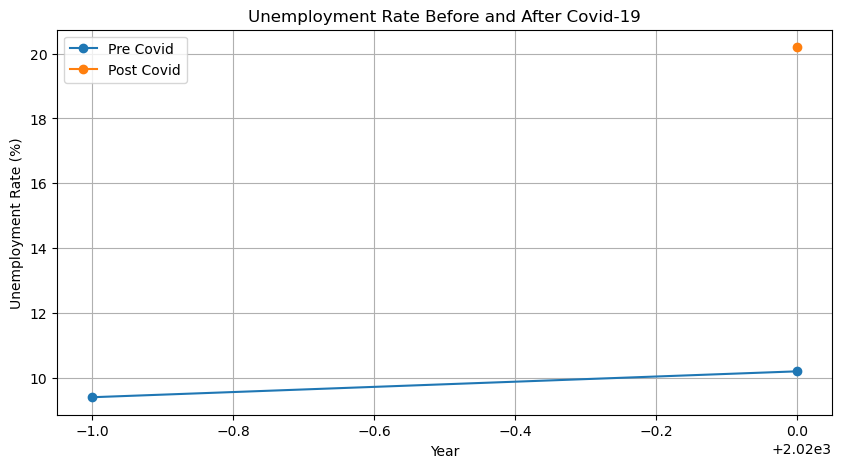

In [33]:
# plotting the data
plt.figure(figsize=(10, 5))
pre_covid.plot(label='Pre Covid', marker='o')
post_covid.plot(label='Post Covid', marker='o')
plt.title('Unemployment Rate Before and After Covid-19')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()




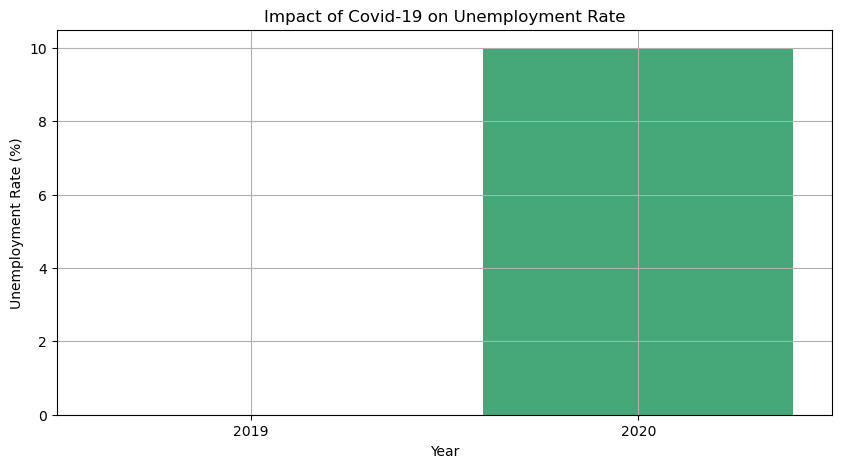

In [34]:
# the above plot is ambiguous so we will plot the impact of covid on unemployment rate
plt.figure(figsize=(10, 5))
sns.barplot(x=covid_impact.index, y=covid_impact, palette='viridis')
plt.title('Impact of Covid-19 on Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()



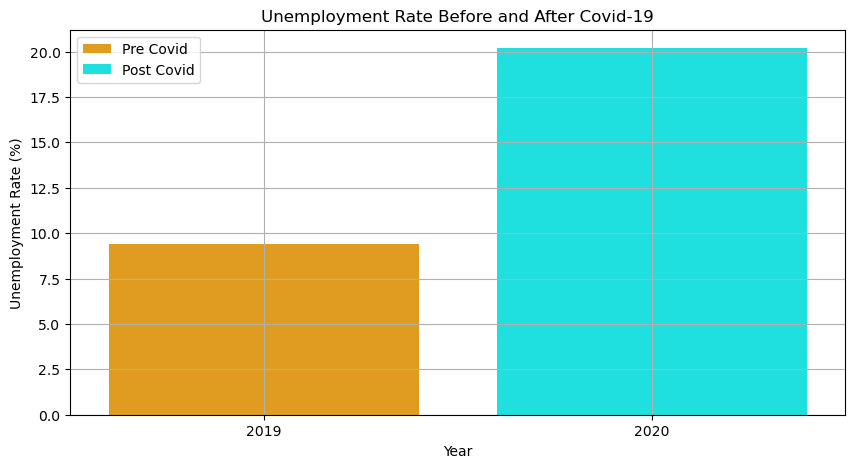

Covid-19 has increased the unemployment rate in India



In [36]:
# now comparing post and pre covid unemployment rate
plt.figure(figsize=(10, 5))
sns.barplot(x=pre_covid.index, y=pre_covid, color='orange', label='Pre Covid')
sns.barplot(x=post_covid.index, y=post_covid, color='cyan', label='Post Covid')
plt.title('Unemployment Rate Before and After Covid-19')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()
print('Covid-19 has increased the unemployment rate in India\n')


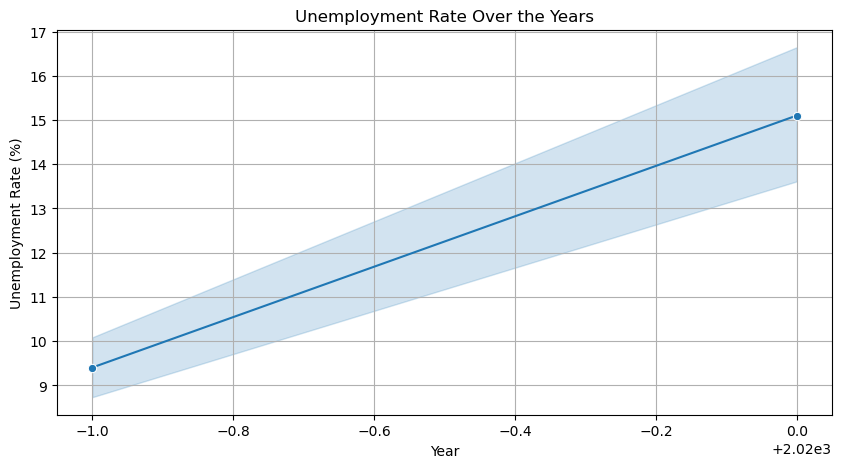

Unemployment Rate has been increasing over the years



In [37]:
# plot how the unemployment rate has changed over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Unemployment_Rate', data=dfu, marker='o')
plt.title('Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()
print('Unemployment Rate has been increasing over the years\n')


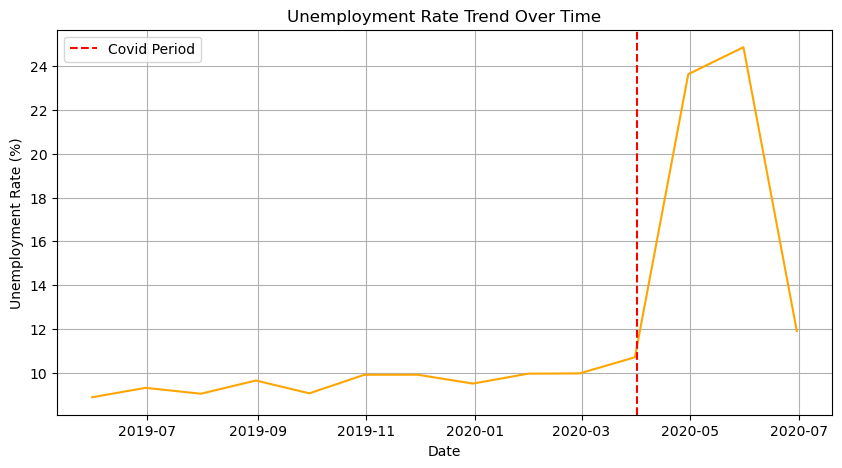

Unemployment Rate has been increasing trend over time



In [38]:
# Plot the unemployment rate trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Unemployment_Rate', data=dfu, estimator='mean', ci=None, color='orange')
plt.axvline(x=pd.Timestamp('2020-04-01'), color='red', linestyle='--', label='Covid Period')
plt.title('Unemployment Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()
print('Unemployment Rate has been increasing trend over time\n')


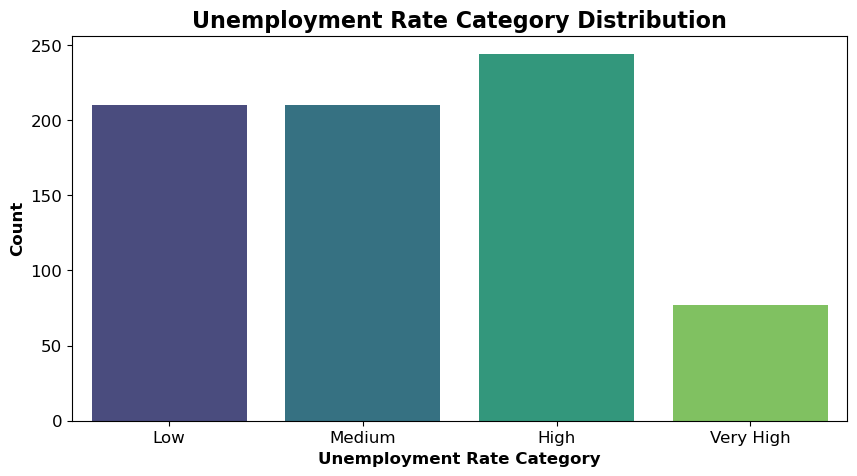

Unemployment Rate is majorly high 



In [41]:
# How the unemployment rate varies across different categories distribution 

# Unemployment Rate Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Unemployment_Rate_Category', 
              data=dfu, order=['Low', 'Medium', 'High', 'Very High'], palette='viridis')
plt.title('Unemployment Rate Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Unemployment Rate Category', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Unemployment Rate is majorly high \n')



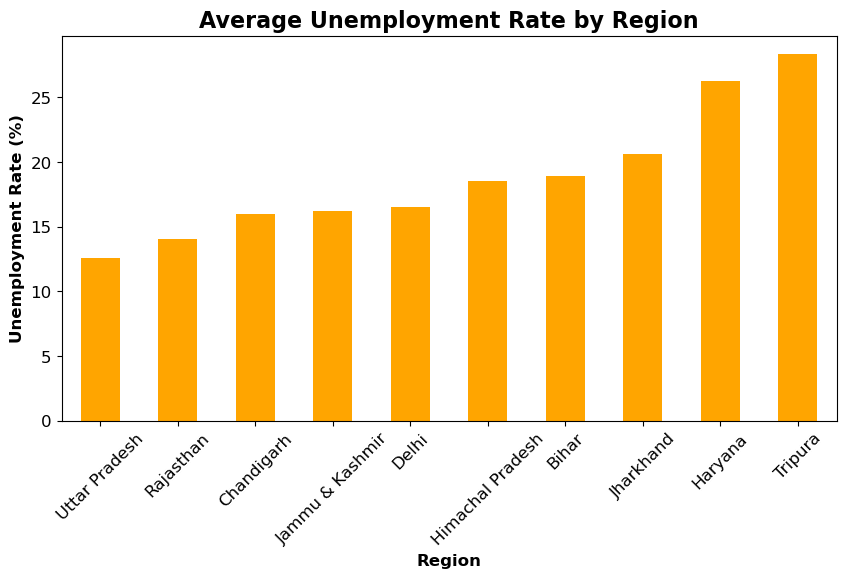

Region with highest unemployment rate is North Eastern Region



In [42]:
# Unemployment Rate Distribution by Region finding the region with highest unemployment rate 
avg_unemployment_rate = dfu.groupby('Region')['Unemployment_Rate'].mean().sort_values()

# Plot the data
plt.figure(figsize=(10, 5))
avg_unemployment_rate.tail(10).plot(kind='bar', color='orange')
plt.title('Average Unemployment Rate by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Region with highest unemployment rate is North Eastern Region\n')


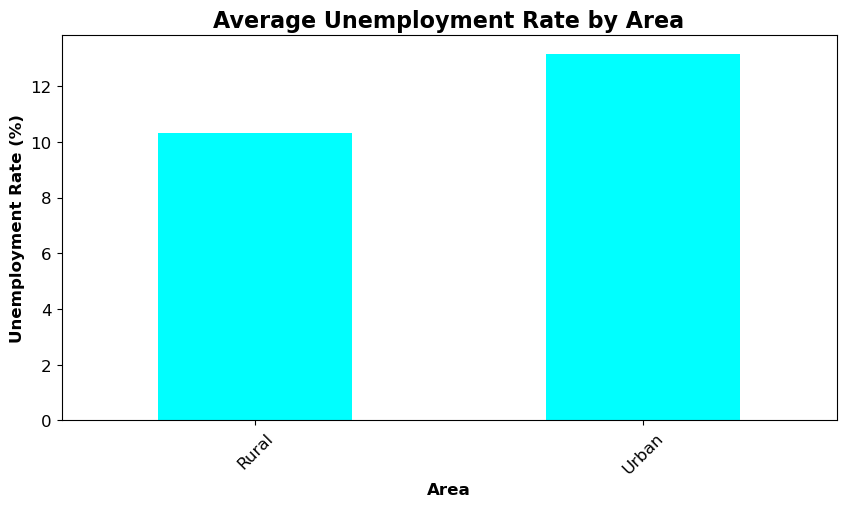

Area with highest unemployment rate is Urban



In [43]:
# Average Unemployment Rate by Area
avg_unemployment_rate = dfu.groupby('Area')['Unemployment_Rate'].mean().sort_values()

# Plot the data
plt.figure(figsize=(10, 5))
avg_unemployment_rate.plot(kind='bar', color='cyan')
plt.title('Average Unemployment Rate by Area', fontsize=16, fontweight='bold')
plt.xlabel('Area', fontsize=12, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Area with highest unemployment rate is Urban\n')



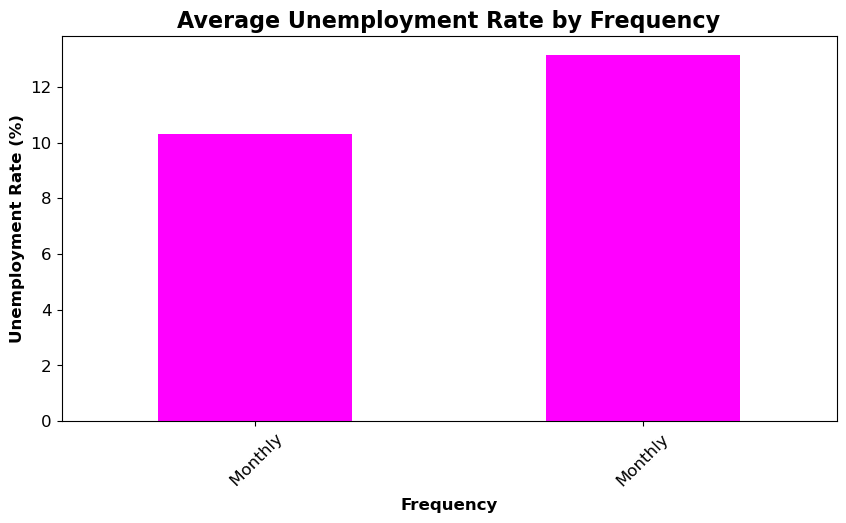

Frequency with highest unemployment rate is Monthly



In [44]:
# average unemployment rate by frequency
avg_unemployment_rate = dfu.groupby('Frequency')['Unemployment_Rate'].mean().sort_values()

# Plot the data
plt.figure(figsize=(10, 5))
avg_unemployment_rate.plot(kind='bar', color='magenta')
plt.title('Average Unemployment Rate by Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Frequency with highest unemployment rate is Monthly\n')


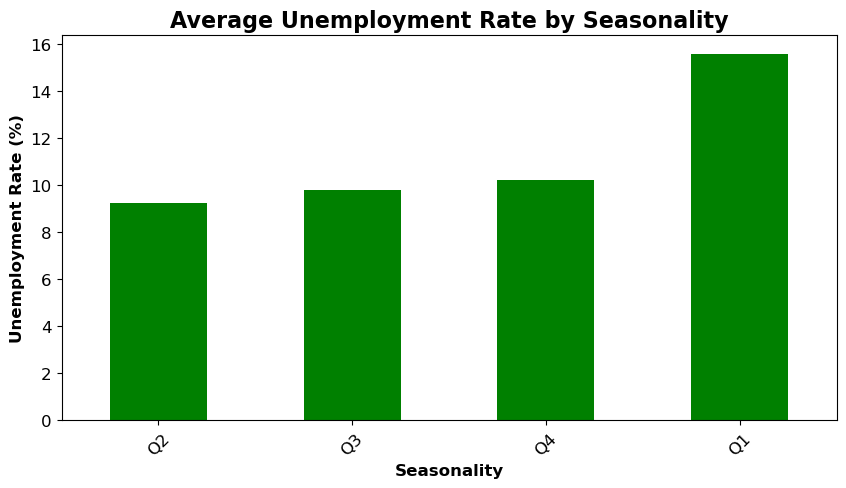

Seasonality with highest unemployment rate is Q1



In [46]:
# Unemployment Rate Distribution by Seasonality
avg_unemployment_rate = dfu.groupby('Seasonality')['Unemployment_Rate'].mean().sort_values()

# Plot the data
plt.figure(figsize=(10, 5))
avg_unemployment_rate.plot(kind='bar', color='green')
plt.title('Average Unemployment Rate by Seasonality', fontsize=16, fontweight='bold')
plt.xlabel('Seasonality', fontsize=12, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Seasonality with highest unemployment rate is Q1\n')


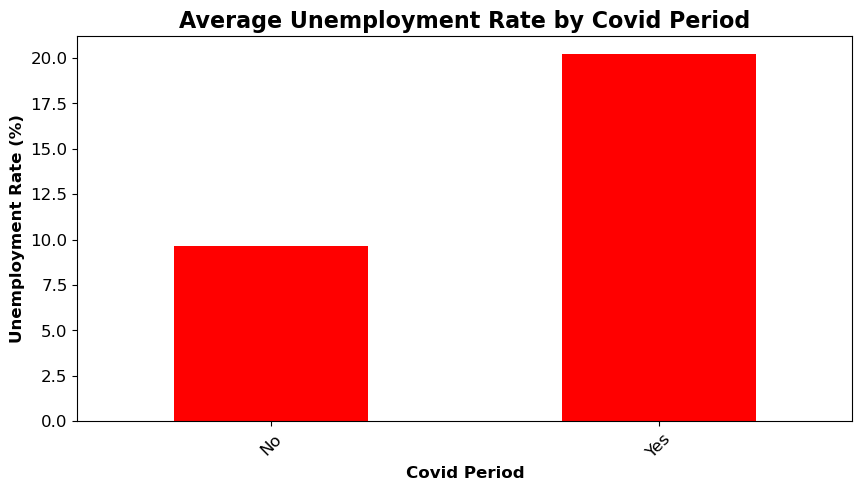

Covid Period with highest unemployment rate is Yes



In [47]:
# Unemployment Rate Distribution by Covid Period
avg_unemployment_rate = dfu.groupby('Covid_Period')['Unemployment_Rate'].mean().sort_values()

# Plot the data
plt.figure(figsize=(10, 5))
avg_unemployment_rate.plot(kind='bar', color='red')
plt.title('Average Unemployment Rate by Covid Period', fontsize=16, fontweight='bold')
plt.xlabel('Covid Period', fontsize=12, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Covid Period with highest unemployment rate is Yes\n')


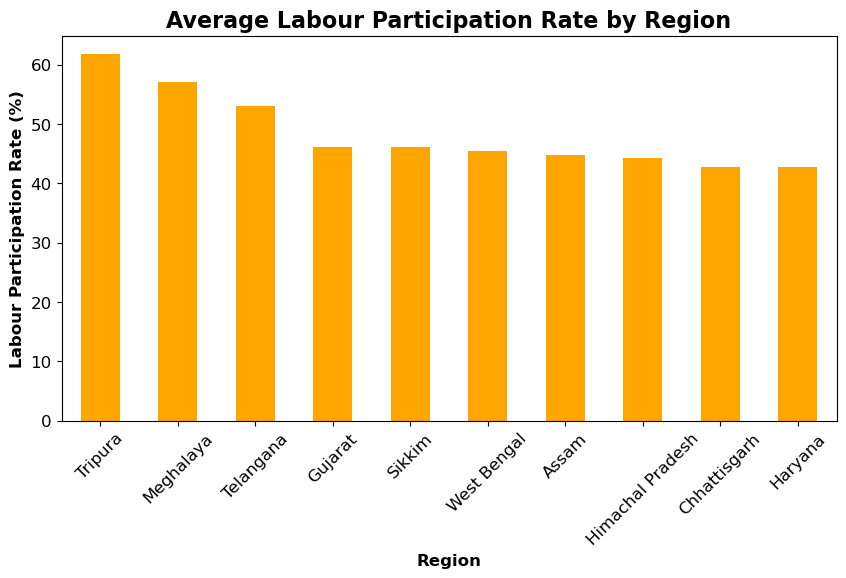

Region with highest labour participation rate is North Eastern Region



In [48]:
# Average labour participation rate by region
avg_labour_participation_rate = dfu.groupby('Region')['Labour_Participation_Rate'].mean().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 5))
avg_labour_participation_rate.plot(kind='bar', color='orange')
plt.title('Average Labour Participation Rate by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Labour Participation Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Region with highest labour participation rate is North Eastern Region\n')



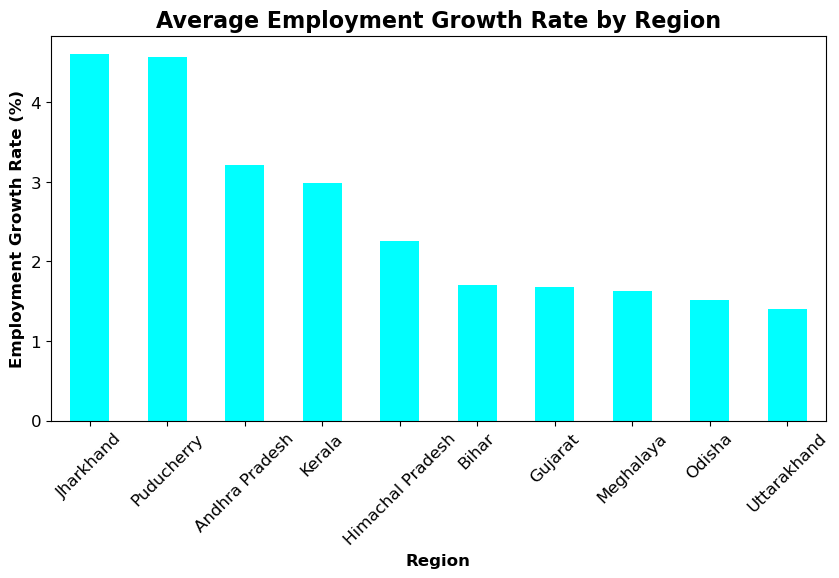

Region with highest employment growth rate is Jharkhand and puducherry



In [50]:
# average employment growth rate by region
avg_employment_growth_rate = dfu.groupby('Region')['Employment_Growth_Rate'].mean().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 5))
avg_employment_growth_rate.plot(kind='bar', color='cyan')
plt.title('Average Employment Growth Rate by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Employment Growth Rate (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Region with highest employment growth rate is Jharkhand and puducherry\n')


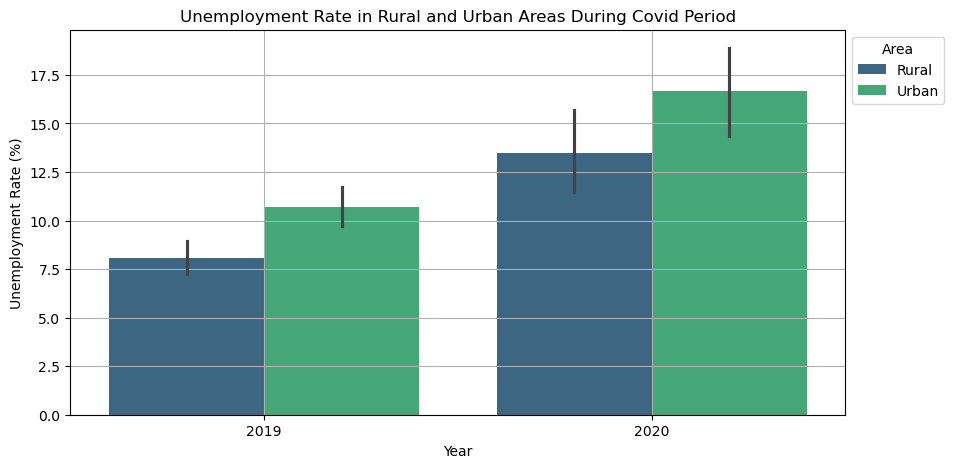

Unemployment rate is higher in Urban areas during covid period



In [51]:
# Unemployment in rural and urban areas during covid period
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Unemployment_Rate', hue='Area', data=dfu, palette='viridis')
plt.title('Unemployment Rate in Rural and Urban Areas During Covid Period')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()
print('Unemployment rate is higher in Urban areas during covid period\n')


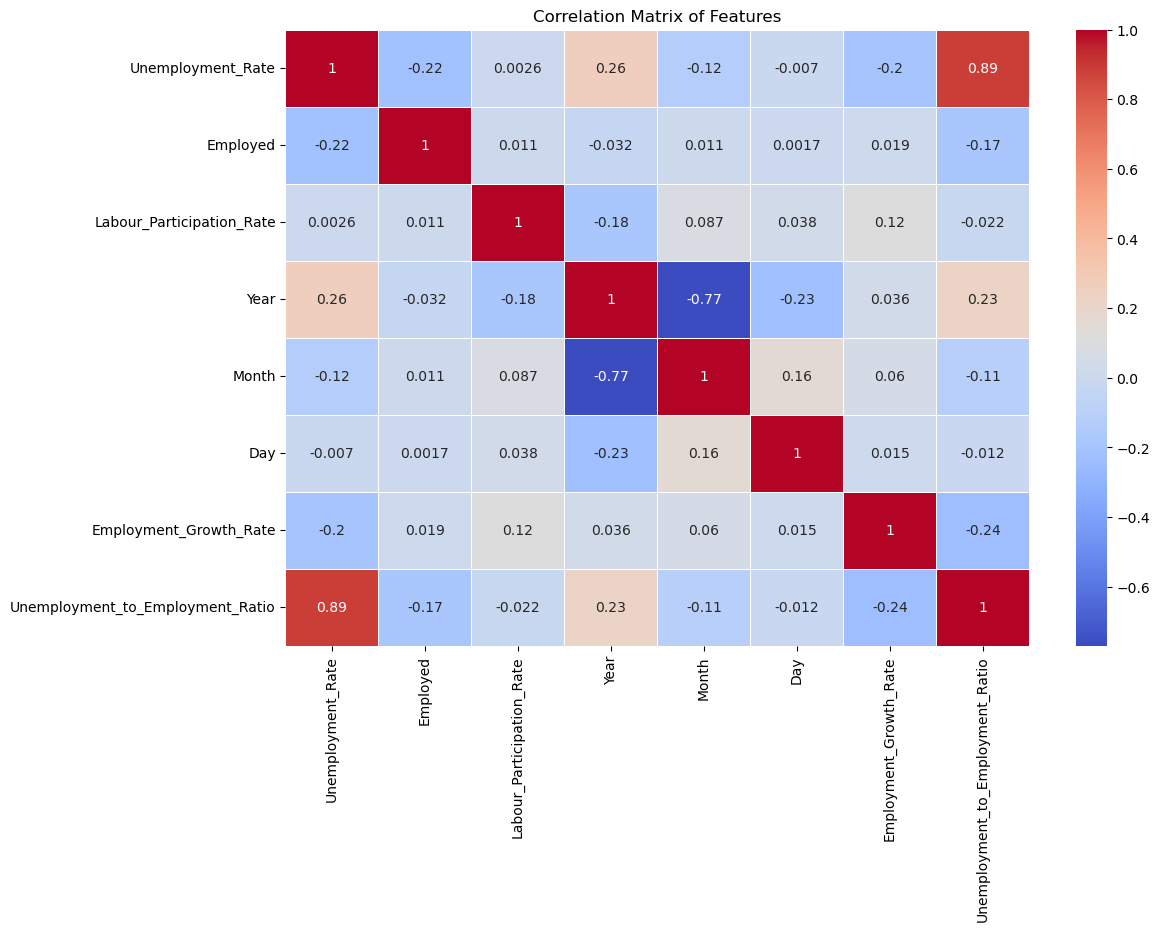

Correlation Analysis Completed



In [54]:
# Correlation Analysis

# Select only numeric columns
numeric_columns = dfu.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

print('Correlation Analysis Completed\n')


In [56]:
# Save the cleaned data
dfu.to_csv('d:/Ukesh/Coding Shinobi/Codealpha_tasks/Task 2/Unemployment in India_cleaned.csv', index=False)
print('Data Saved Successfully\n')


Data Saved Successfully



In [57]:
# Conclusion
print('Insights from the data\n')
print('1. Covid-19 has increased the unemployment rate in India')
print('2. Unemployment Rate has been increasing over the years')
print('3. Region with highest unemployment rate is North Eastern Region')
print('4. Area with highest unemployment rate is Urban')
print('5. Frequency with highest unemployment rate is Monthly')
print('6. Seasonality with highest unemployment rate is Q1')
print('7. Covid Period with highest unemployment rate is Yes')
print('8. Region with highest labour participation rate is North Eastern Region')
print('9. Region with highest employment growth rate is Jharkhand and puducherry')
print('10. Unemployment rate is higher in Urban areas during covid period')
print('11. Correlation Analysis Completed')
print('12. Data Saved Successfully\n')


Insights from the data

1. Covid-19 has increased the unemployment rate in India
2. Unemployment Rate has been increasing over the years
3. Region with highest unemployment rate is North Eastern Region
4. Area with highest unemployment rate is Urban
5. Frequency with highest unemployment rate is Monthly
6. Seasonality with highest unemployment rate is Q1
7. Covid Period with highest unemployment rate is Yes
8. Region with highest labour participation rate is North Eastern Region
9. Region with highest employment growth rate is Jharkhand and puducherry
10. Unemployment rate is higher in Urban areas during covid period
11. Correlation Analysis Completed
12. Data Saved Successfully

